In [89]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model as lm
from sklearn import svm
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("E:/TAMU/Sem_2/ISEN_619/Project/TrainingData_2015_csv.csv", sep=",")

In [3]:
train = df(train)

In [5]:
df.head(train)

,Time,Wind Speed (V),Wind Speed_Std,Wind Direction (D),Environment Temperature (T),Turbulence Intensity (I),Power_Avg
0,01-01-15 0:10,8.025,0.504,327.346,1.170,0.062804,0.803112
1,01-01-15 0:20,8.946,0.540,330.198,0.875,0.060362,0.969471
2,01-01-15 0:30,9.147,0.480,334.323,0.876,0.052476,1.000000
3,01-01-15 0:40,8.561,0.673,335.525,0.755,0.078612,0.896077
4,01-01-15 0:50,7.578,0.384,334.049,0.531,0.050673,0.669709


In [4]:
train = train.iloc[:, 1:7]

In [7]:
df.head(train)

,Wind Speed (V),Wind Speed_Std,Wind Direction (D),Environment Temperature (T),Turbulence Intensity (I),Power_Avg
0,8.025,0.504,327.346,1.170,0.062804,0.803112
1,8.946,0.540,330.198,0.875,0.060362,0.969471
2,9.147,0.480,334.323,0.876,0.052476,1.000000
3,8.561,0.673,335.525,0.755,0.078612,0.896077
4,7.578,0.384,334.049,0.531,0.050673,0.669709


In [5]:
train_x = train.iloc[:, 0:5]

In [9]:
df.head(train_x)

,Wind Speed (V),Wind Speed_Std,Wind Direction (D),Environment Temperature (T),Turbulence Intensity (I)
0,8.025,0.504,327.346,1.170,0.062804
1,8.946,0.540,330.198,0.875,0.060362
2,9.147,0.480,334.323,0.876,0.052476
3,8.561,0.673,335.525,0.755,0.078612
4,7.578,0.384,334.049,0.531,0.050673


In [6]:
train_x.columns = ['Wind_speed', 'Wind_speed_std', 'Wind_direction', 'Environment_temperature', 'Turbulence_intensity']

In [7]:
train_y = train.iloc[:, 5]

In [8]:
train_y = df(train_y)

In [13]:
df.head(train_y)

,Power_Avg
0,0.803112
1,0.969471
2,1.000000
3,0.896077
4,0.669709


### Split training data 70 - 30

In [25]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(21697, 5) (21697, 1)
(9300, 5) (9300, 1)


### Plots

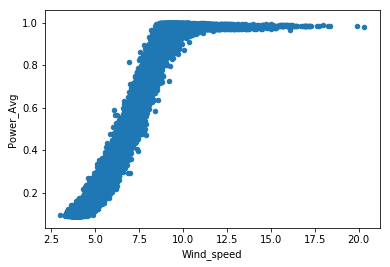

In [14]:
data = pd.concat([train_x['Wind_speed'], train_y['Power_Avg']], axis = 1)
data.plot.scatter(x='Wind_speed', y='Power_Avg')

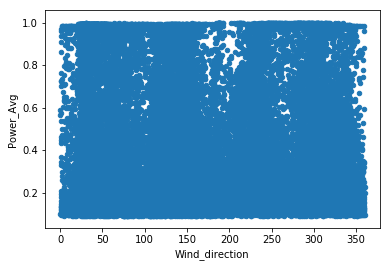

In [15]:
data1 = pd.concat([train_x['Wind_direction'], train_y['Power_Avg']], axis = 1)
data1.plot.scatter(x='Wind_direction', y='Power_Avg')

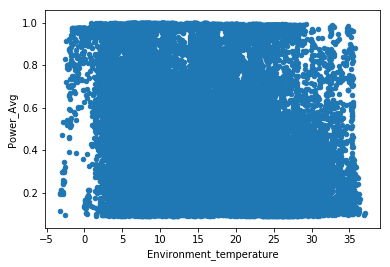

In [16]:
data2 = pd.concat([train_x['Environment_temperature'], train_y['Power_Avg']], axis = 1)
data2.plot.scatter(x='Environment_temperature', y='Power_Avg')

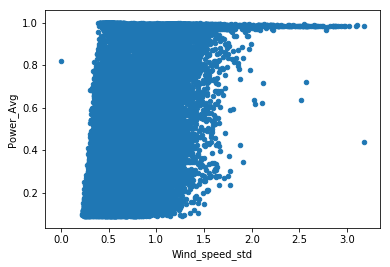

In [17]:
data3 = pd.concat([train_x['Wind_speed_std'], train_y['Power_Avg']], axis = 1)
data3.plot.scatter(x='Wind_speed_std', y='Power_Avg')

# Linear regression

In [13]:
linreg = lm.LinearRegression()

In [26]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
linreg.coef_

array([[ 1.81178789e-01, -3.51924269e-01, -5.67328696e-05,
        -3.29004970e-03,  1.96889617e+00]])

In [28]:
pred_y_linreg = linreg.predict(X_train)

In [29]:
np.sqrt(mean_squared_error(pred_y_linreg,y_train))

0.08099726166304055

In [81]:
pred_val_linreg = linreg.predict(X_val)

In [82]:
np.sqrt(mean_squared_error(pred_val_linreg,y_val))

0.07799735427639812

# Ridge Regression

In [32]:
ridge = lm.RidgeCV(alphas=[0.1, 0.5, 1.0])

In [33]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=[0.1, 0.5, 1.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [34]:
ridge.coef_

array([[ 1.79802461e-01, -3.40695080e-01, -5.72401750e-05,
        -3.29410293e-03,  1.89750818e+00]])

In [35]:
ridge.alpha_

0.1

In [36]:
pred_y_ridge = ridge.predict(X_train)

In [37]:
np.sqrt(mean_squared_error(pred_y_ridge,y_train))

0.08100123142702502

In [38]:
pred_val_ridge = ridge.predict(X_val)

In [39]:
np.sqrt(mean_squared_error(pred_val_ridge,y_val))

0.0780095544670336

# SVM

In [41]:
svm1 = svm.SVR(kernel = "rbf")

In [43]:
svm1.fit(X_train, y_train)

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
svm1.score(X_train, y_train)

0.9362525882048364

In [45]:
pred_y_svm = svm1.predict(X_train)

In [46]:
np.sqrt(mean_squared_error(pred_y_svm,y_train))

0.07015614816180205

In [47]:
pred_val_svm = svm1.predict(X_val)

In [48]:
np.sqrt(mean_squared_error(pred_val_svm,y_val))

0.08584703049846333

In [ ]:
svm2 = svm.SVR(C = 0.5, kernel = 'rbf')

In [32]:
svm2.fit(train_x, train_y)

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
predict_y_svm2 = svm2.predict(train_x)

In [34]:
np.sqrt(mean_squared_error(predict_y_svm2,train_y))

0.06822280323625914

### Crossvalidation for finding best parameters SVM

In [85]:
param_grid_svm = {
                    'C' : [0.25, 0.5, 1, 3],
                    'kernel' : ['rbf', 'poly', 'sigmoid']
}

In [86]:
svm3 = svm.SVR()

In [87]:
from sklearn.grid_search import GridSearchCV

grid_svm = GridSearchCV(svm3, param_grid_svm, cv=10)
grid_svm.fit(X_train, y_train)

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

KeyboardInterrupt: 

# Gaussian process

In [74]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR

In [75]:
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C

In [97]:
train_sample = train.sample(frac = 0.2)

In [98]:
train_x_sample = train_sample.iloc[:, 0:5]

In [99]:
train_y_sample = train_sample.iloc[:, 5]

In [100]:
df.head(train_x_sample)

,Wind Speed (V),Wind Speed_Std,Wind Direction (D),Environment Temperature (T),Turbulence Intensity (I)
5738,10.555,1.167,30.299,5.663,0.110564
483,6.793,0.911,332.203,9.749,0.134109
8341,10.925,1.115,156.304,13.091,0.102059
12789,6.323,0.424,182.109,19.006,0.067057
22845,8.683,0.984,138.303,24.251,0.113325


In [101]:
train_y_sample = df(train_y_sample)

In [102]:
df.head(train_y_sample)

,Power_Avg
5738,0.993726
483,0.564413
8341,0.992884
12789,0.385294
22845,0.904753


In [103]:
kernel = RBF()

In [104]:
gpr = GPR(kernel = kernel, n_restarts_optimizer=9)

In [105]:
gpr.fit(train_x_sample, train_y_sample)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=RBF(length_scale=1), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [106]:
y_gpr_pred = gpr.predict(train_x_sample)

In [107]:
np.sqrt(mean_squared_error(y_gpr_pred, train_y_sample))

1.492880923006067e-08

In [108]:
test_sample = train.sample(frac = 0.05)

In [109]:
test_x_sample = test_sample.iloc[:, 0:5]

In [110]:
test_y_sample = test_sample.iloc[:, 5]

In [111]:
df.head(test_x_sample)

,Wind Speed (V),Wind Speed_Std,Wind Direction (D),Environment Temperature (T),Turbulence Intensity (I)
17763,6.371,0.925,110.663,23.352,0.145189
15747,4.277,0.592,85.607,23.952,0.138415
23991,6.174,0.475,210.647,20.846,0.076936
5464,4.690,0.572,144.381,7.570,0.121962
26373,6.047,0.939,45.627,14.300,0.155284


In [112]:
test_y_sample = df(test_y_sample)

In [113]:
df.head(test_y_sample)

,Power_Avg
17763,0.431722
15747,0.141317
23991,0.280384
5464,0.203467
26373,0.409835


In [114]:
y_gpr_test_pred = gpr.predict(test_x_sample)

In [115]:
np.sqrt(mean_squared_error(y_gpr_test_pred, test_y_sample))

0.13067774751438643

## Random forest

In [90]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rf

In [91]:
df.head(X_train)

,Wind_speed,Wind_speed_std,Wind_direction,Environment_temperature,Turbulence_intensity
2917,6.107,1.150,82.647,4.324,0.188308
12961,6.198,0.447,225.052,23.118,0.072120
1135,5.706,0.566,81.819,8.254,0.099194
9306,6.090,0.609,331.343,11.141,0.100000
14920,5.568,0.768,168.245,22.800,0.137931


In [92]:
df.head(y_train)

,Power_Avg
2917,0.420476
12961,0.390024
1135,0.324500
9306,0.398906
14920,0.244480


#### Random forest on splitted data

In [93]:
randforest = rf(bootstrap = True, criterion='mse', max_depth = 2000, oob_score = True)

In [107]:
oob = []
for i in range(1,200):
    randforest = rf(bootstrap = True, criterion='mse', max_depth = 2000, oob_score = True, n_estimators = i).fit(X_train, y_train)
    oob.append(randforest.oob_score_)

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not ha

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
oob

[-1.0099219662563872,
 -0.30311382110691754,
 0.1598112504363568,
 0.4720093742182295,
 0.6629386589081634,
 0.7710409229630943,
 0.8577374496481334,
 0.9065774260235411,
 0.9377951947648101,
 0.9560793629645206,
 0.9653954466264394,
 0.9698737517315307,
 0.9750715977488122,
 0.9781965136133158,
 0.9838796879593737,
 0.9836654965576357,
 0.9862268422288735,
 0.9855707320866748,
 0.9865396058620766,
 0.9868978751728539,
 0.9869644461270226,
 0.9871394349323892,
 0.9871279856537447,
 0.9873850217838581,
 0.9873464409038276,
 0.98735476100599,
 0.9874382725077896,
 0.9875451270704008,
 0.9875687531780311,
 0.9875923571290122,
 0.9875398912256089,
 0.9876466095778302,
 0.9877104875831952,
 0.9876227668048476,
 0.9878557849005828,
 0.9878243559442756,
 0.9878082557126221,
 0.9877829220155342,
 0.98791851800959,
 0.9878893985047235,
 0.9880424854179249,
 0.9879283368050598,
 0.987986027691705,
 0.9879676051295071,
 0.9879898651527631,
 0.9879234262487264,
 0.9880094673199653,
 0.988110494731

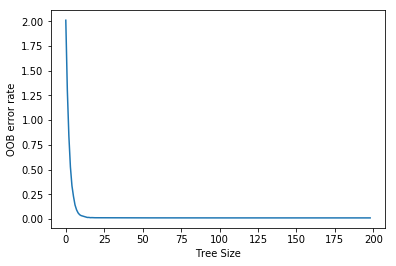

In [111]:
plt.xlabel('Tree Size')
plt.ylabel('OOB error rate')
plt.plot(np.subtract(1,np.array(oob)))

In [41]:
print(randforest.feature_importances_)

[9.88854277e-01 8.56142046e-04 2.24638379e-03 7.12107558e-03
 9.22121403e-04]


In [46]:
y_pred = randforest.predict(X_val)

In [47]:
y_val_array = np.array(y_val)

In [48]:
y_val_array

array([[0.3214213 ],
       [0.2267048 ],
       [0.97327093],
       ...,
       [0.67696362],
       [0.31875278],
       [0.2470534 ]])

In [49]:
np.sqrt(mean_squared_error(y_pred,y_val_array))

0.03377849123154196

### Random forest on full data

In [55]:
rf_full = rf(bootstrap = False, criterion='mse', max_depth = 10)

In [56]:
rf_full.fit(train_x, train_y)

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
y_pred_full = rf_full.predict(train_x)

In [58]:
np.sqrt(mean_squared_error(y_pred_full, train_y))

0.02708621216788669

### Cross validation for finding best combination of parameters

In [61]:
param_grid = {
                'n_estimators': [5, 10, 15, 20],
                'max_depth': [2, 5, 7, 9],
                'bootstrap' : [True, False]
             }

In [62]:
randomforestCV = rf()

In [64]:
from sklearn.grid_search import GridSearchCV

grid_rf = GridSearchCV(randomforestCV, param_grid, cv=10)
grid_rf.fit(X_train, y_train)

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20], 'max_depth': [2, 5, 7, 9], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [65]:
grid_rf.best_params_

{'bootstrap': True, 'max_depth': 9, 'n_estimators': 20}

### Fitting random forest model with the best parameters obtained using cross validation 
(applied on splitted data)

In [68]:
new_rf = rf(bootstrap = True, n_estimators = 20, max_depth = 9)

In [69]:
new_rf.fit(X_train, y_train)

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [72]:
y_rf_pred_train = new_rf.predict(X_train)

In [73]:
np.sqrt(mean_squared_error(y_rf_pred_train, y_train))

0.026545856706394956

In [70]:
y_rf_pred = new_rf.predict(X_val)

In [71]:
np.sqrt(mean_squared_error(y_rf_pred, y_val))

0.030797827371999913